# 02 — Exploratory Data Analysis
**ClinicalTrials.gov Dataset**  
*Author: John Seaton*  
*Last updated: 2025-12-14*

---

## 1. Scope & Role of this Notebook

**Project context:** This notebook performs exploratory data analysis (EDA) on the ClinicalTrials.gov dataset to understand broad patterns in global clinical trial activity and drug development.

**Data source:** ClinicalTrials.gov (public registry of clinical studies)  
**Scope / time range:** This project uses the full available ClinicalTrials.gov dataset, covering the entire historical range of registered trials  
**Unit of analysis:** One row per clinical trial (`NCT Number`) in the primary dataset.

**Inputs:**  
- `data/raw/ClinicalTrials/ctg-studies.csv` (ClinicalTrials.gov trial-level export used throughout the project)

**Outputs:**  
- There are no processed datasets written by this notebook (EDA only).  
- Figures/tables generated here inform the 03_cleaning and 04_analysis notebooks.

**Goals:**   
- Understand key variables such as phase, enrollment, dates, interventions, locations
- Uncover any outliers that may exist
- Provide a in-depth summary of column missingness
- Explore links between categories and any obvious categorical patterns
- Develop a plan for the cleaning process to be undertaken in 03_cleaning.ipynb

This notebook does not modify the original data.

## 2. Imports and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

## 3. Load Raw Data

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/ClinicalTrials/ctg-studies.csv')
df.shape

(530028, 22)

## 4. High Level DataFrame Exploration

In [3]:
df.describe(include='all') # Includes non-numeric columns in output


,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
count,530028,530028,530028,530028,530025,477836,516558,387051,530028,172143,...,5.261540e+05,530028,530028,530028,530028,513022,517679,530028,486954,47926
unique,530028,528594,530028,8,214914,396586,508913,384364,46212,73628,...,NaN,9,2,1692,9234,9933,10477,6093,289919,47926
top,NCT05299372,Sun Protection Factor Assay,https://clinicaltrials.gov/study/NCT05299372,COMPLETED,Healthy,OTHER: No intervention,"Bioequivalence, within 30 days","Progress free survival（PFS）, 1 year|Overall su...",Cairo University,National Cancer Institute (NCI),...,NaN,OTHER,INTERVENTIONAL,Observational Model: |Time Perspective: p,2014-01,2025-12-31,2025-12-31,2003-01-27,"National Institutes of Health Clinical Center,...","Study Protocol and Statistical Analysis Plan, ..."
freq,1,14,1,304615,8497,1235,118,18,3599,8091,...,NaN,375118,406244,123784,2078,3768,4188,1515,1515,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.582321e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.805406e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.920000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#  Small sample of the dataframe
df.sample(3)

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
452174,NCT01278771,Coronary Anomalies in Congenital Heart Disease,https://clinicaltrials.gov/study/NCT01278771,UNKNOWN,Congenital Heart Disease,NaN,NaN,NaN,Rambam Health Care Campus,NaN,...,1200.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2011-03,NaN,NaN,2011-01-19,NaN,NaN
208067,NCT05010122,"ASTX727, Venetoclax, and Gilteritinib for the ...",https://clinicaltrials.gov/study/NCT05010122,RECRUITING,Acute Myeloid Leukemia|Myelodysplastic Syndrom...,DRUG: Decitabine and Cedazuridine|DRUG: Gilter...,"Maximum tolerated dose (Phase I), Up to 28 day...","Complete response rate, Will also be estimated...",M.D. Anderson Cancer Center,NaN,...,42.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2021-07-08,2026-01-30,2026-01-30,2021-08-18,"M D Anderson Cancer Center, Houston, Texas, 77...",NaN
487265,NCT02742545,Impact of MayoExpertAdvisor on Provider Adherence,https://clinicaltrials.gov/study/NCT02742545,COMPLETED,Hyperlipidemia|Atrial Fibrillation|Heart Failure,BEHAVIORAL: MayoExpertAdvisor,Percentage of pre-visit recommendations for hy...,NaN,Mayo Clinic,NaN,...,2248.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-04,2016-11,2016-11,2016-04-19,"Mayo Clinic in Rochester, Rochester, Minnesota...",NaN


In [ ]:
# Show number of unique values in each field
df.nunique()

NCT Number                    530028
Study Title                   528594
Study URL                     530028
Study Status                       8
Conditions                    214914
Interventions                 396586
Primary Outcome Measures      508913
Secondary Outcome Measures    384364
Sponsor                        46212
Collaborators                  73628
Age                                6
Phases                             7
Enrollment                      8840
Funder Type                        9
Study Type                         2
Study Design                    1692
Start Date                      9234
Primary Completion Date         9933
Completion Date                10477
First Posted                    6093
Locations                     289919
Study Documents                47926
dtype: int64

Unique NCT Number quantity matches total number of rows, which confirms no duplicates for this field, though duplicates are still verified explicitly below.

In [6]:
# Confirm no duplicate rows in the dataframe
df.duplicated().sum()

np.int64(0)

In [7]:
# Return number of null values for each field
df.isna().sum()

NCT Number                         0
Study Title                        0
Study URL                          0
Study Status                       0
Conditions                         3
Interventions                  52192
Primary Outcome Measures       13470
Secondary Outcome Measures    142977
Sponsor                            0
Collaborators                 357885
Age                                0
Phases                        325790
Enrollment                      3874
Funder Type                        0
Study Type                         0
Study Design                       0
Start Date                         0
Primary Completion Date        17006
Completion Date                12349
First Posted                       0
Locations                      43074
Study Documents               482102
dtype: int64

In [8]:
# High-level missingness snapshot
df.isna().mean().sort_values(ascending=False).head(15)

Study Documents               0.909578
Collaborators                 0.675219
Phases                        0.614666
Secondary Outcome Measures    0.269754
Interventions                 0.098470
Locations                     0.081267
Primary Completion Date       0.032085
Primary Outcome Measures      0.025414
Completion Date               0.023299
Enrollment                    0.007309
Conditions                    0.000006
Study Status                  0.000000
NCT Number                    0.000000
Study Title                   0.000000
Study URL                     0.000000
dtype: float64

The columns containing missing data will be addressed in the following ways:

`Study Documents` (90.9% missing): Nearly entirely missing, and not central to an analysis of drug development. Column will be dropped from dataframe entirely.

`Collaborators` (67.5% missing): Majority of data is missing. It can be useful to understand links between collaborators and clinical trail focuses where possible, but both Sponsor and Funder Type will provide more useful and complete data for this analysis. As a result, the Collaborators column will be dropped from the dataframe entirely.

`Phases` (61.5% missing): Phases are important to the analysis of drug development and identifying which trial types and Intervention types are more or less successful. Despite missing 61% of Phases data in this dataset, this column will be retained, and the missing values will be left untouched. Missingness of the Phases column wil be re-investigated once rows are reduced to only the clinical trials focused on drug and biological intervention types, as I suspect a disproportionate amount of missing Phases data comes from Observational trial types.

`Primary Outcome Measures` (2.3% missing) and `Secondary Outcome Measures` (27.0% missing): These will both be kept in the dataset. Data will not be removed due to lack of outcome measure information, but a cursory look at where Primary Outcome Measures is missing will be performed to identify any obvious contributing factors to missing data.

`Interventions` (9.8% missing): Interventions is central to any analysis of clinical trial involvement in drug development. The missing values will be analyzed and studies may be removed if the reason for lack of Interventions data is not apparent.

`Locations` (8.1% missing): Locations data is important for understanding clinical trial locations' impact on global drug development, and as a result the data will be analyzed to understand each case where Location data is absent. Data may be removed where Location data is not present, as it undermines the authenticity of the trials themselves.

`Primary Completion Date` (3.2% missing) and `Completion Date` (2.3% missing): These missing dates are most likely due to trials that are currently ongoing, but this will need to be verified.

`Enrollment` (0.7% missing): It is not immediately clear why Enrollment data would not be included, and these missing instances will require further investigation.

### Building a Missingness Map

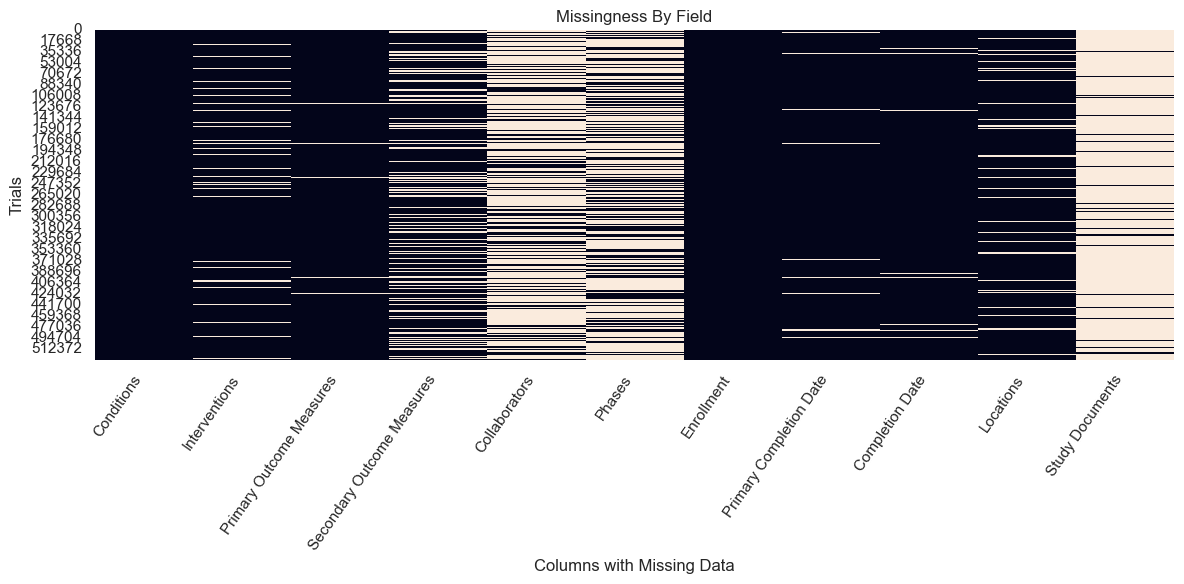

In [11]:
cols_with_na = df.columns[df.isna().any()]
missing = df[cols_with_na].isna()
plt.figure(figsize=(12, 6))
sns.heatmap(missing, cbar=False)
plt.title('Missingness By Field')
plt.xlabel('Columns with Missing Data')
plt.ylabel('Trials')
plt.xticks(rotation=55, ha='right')
plt.tight_layout()

The Study Documents column will be dropped from this dataset in the 03_cleaning notebook due to the extremely high amount of missing data. The Collaborators column will also be dropped from this dataset due to the high percentage of missing data, the messiness of the data strings that do exist, and because the Sponsor field and Funder Type field already capture some of the relevant details contained in Collaborators. The Phases column is missing an alarming amount of data but will be kept in the dataset and cleaned due to the importance of the information to this analysis.

## 5. Enrollment Analysis

Enrollment is the only numeric datatype in this entire dataset. It is difficult to analyze and visualize due to the extremely wide range of values. The below outputs are an attempt to contextualize and visualize the enrollment numbers for the 530,000+ clinical trials included in this dataset. The smallest trials involve a single participant, while the largest trials involve upwards of 200 million participants.

In [12]:
df['Enrollment'].describe()

count    5.261540e+05
mean     5.582321e+03
std      4.805406e+05
min      0.000000e+00
25%      3.000000e+01
50%      6.800000e+01
75%      1.920000e+02
max      1.888141e+08
Name: Enrollment, dtype: float64

In [16]:
# Show completed trials with the lowest enrollments
completed = df[(df['Study Status'] == 'COMPLETED') &
    (df['Enrollment'] > 0)]
completed.nsmallest(7, 'Enrollment')[['Study Title', 'Study Status', 'Enrollment']]

,Study Title,Study Status,Enrollment
381,Diltiazem in Jervell and Lange-Nielsen Syndrome,COMPLETED,1.0
407,Objective Assessment for Cleft Lip Nasal Defor...,COMPLETED,1.0
972,A 7-year Assessment on Subject Understanding o...,COMPLETED,1.0
1097,LiveWell: Adapted DBT Skills Training for Meta...,COMPLETED,1.0
1149,Magnetic Resonance Guided High Intensity Focus...,COMPLETED,1.0
1247,Nasal Reconstruction Using a Customized 3D-pri...,COMPLETED,1.0
2452,18F-DOPA PET to Elucidate the Antidepressant M...,COMPLETED,1.0


In [14]:
# Show completed trials with the highest enrollments
completed = df[(df['Study Status'] == 'COMPLETED') &
    (df['Enrollment'] > 0)]
completed.nlargest(7, 'Enrollment')[['Study Title', 'Study Status', 'Enrollment', 'Primary Outcome Measures', 'Study Type', 'Study Design']]

,Study Title,Study Status,Enrollment,Primary Outcome Measures,Study Type,Study Design
201064,Effectiveness of the Oxford-AstraZeneca COVID-...,COMPLETED,188814085.0,COVID-19 confirmed by a positive antigen test ...,OBSERVATIONAL,Observational Model: |Time Perspective: p
169803,Analysis of Drug-drug Interaction Alert Based ...,COMPLETED,67128927.0,NaN,OBSERVATIONAL,Observational Model: |Time Perspective: p
169728,Post-Marketing Safety Study of Severe Acute Re...,COMPLETED,50000000.0,Number of Participants With Adverse Events of ...,OBSERVATIONAL,Observational Model: |Time Perspective: p
122884,Epidemiology of Thrombotic Thrombocytopenia Sy...,COMPLETED,41200246.0,Estimate event rates and describe characterist...,OBSERVATIONAL,Observational Model: |Time Perspective: p
289315,Identification of Anticancer Drugs Associated ...,COMPLETED,36580288.0,Disproportionality individual case data analys...,OBSERVATIONAL,Observational Model: |Time Perspective: p
272826,Effects of Dihydropyridine Calcium Channel Inh...,COMPLETED,32000000.0,association between dihydropyridine CCI or ura...,OBSERVATIONAL,Observational Model: |Time Perspective: p
326942,Drug-Induced Sudden Death & Ventricular Arrhyt...,COMPLETED,31000000.0,"All cause death, All data years",OBSERVATIONAL,Observational Model: |Time Perspective: p


The percentile table below summarizes the distribution of clinical trial enrollments. The average trial has a reasonaable number of participants, at 68 and 90% of all clinical trials enroll fewer than 555 participants. There are however, a small subset of trials with extremely large enrollments, with 1% of trials exceeding 10,000 partcipants, and the top 0.1% of trials exceeding 419,000 participants. It should be noted these ultra-high enrollment trials are almost exclusively observational trials and are not representative of interventional drug or biologic studies, which are the key focus of this analysis.

In [17]:
enroll = pd.to_numeric(df['Enrollment'], errors='coerce')

percentiles = np.percentile(enroll.dropna(), [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9])
for p, v in zip([0,25,50,75,90,95,99,99.5,99.9], percentiles):
    print(f'{p}th percentile: {v:,.0f}')

0th percentile: 0
25th percentile: 30
50th percentile: 68
75th percentile: 192
90th percentile: 554
95th percentile: 1,216
99th percentile: 10,000
99.5th percentile: 30,000
99.9th percentile: 419,897


The below chart visualizes the distribution of trial enrollment using a logarithmic scale to accomodate the wide range of enrollment values. Most trials cluster between a few dozen and a few hundred participants, while the long right tail reflects a smalller number of ultra-high enrollment trials. 

For reference when interpreting the chart:

log(Enrollment + 1) = 2.5 corresponds to a trial enrollment of about 12 participants

log(Enrollment + 1) = 4 corresponds to a trial enrollment of about 54 participants

log(Enrollment + 1) = 5 corresponds to a trial enrollment of about 148 participants

log(Enrollment + 1) = 7.5 corresponds to a trial enrollment of about 1,800 participants


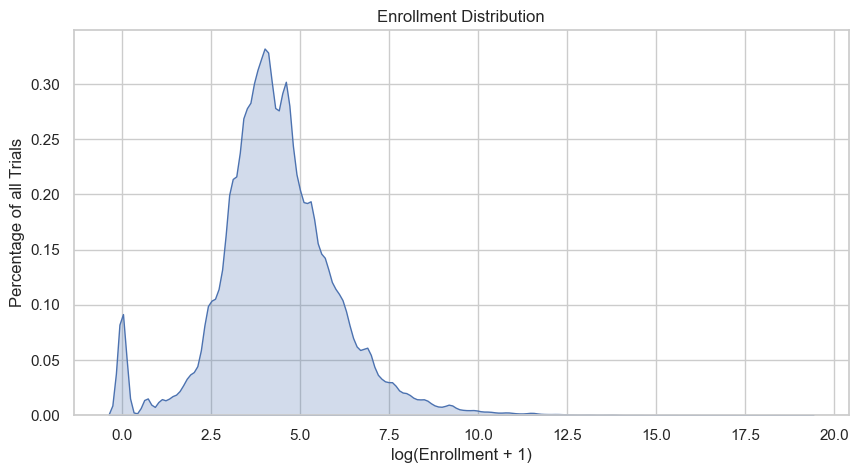

In [19]:
plt.figure(figsize=(10,5))
sns.kdeplot(np.log1p(df['Enrollment']), fill=True)
plt.title('Enrollment Distribution')
plt.xlabel('log(Enrollment + 1)')
plt.ylabel('Percentage of all Trials')
plt.show()

In [20]:
# Identify any potential enrollment outliers
df[df['Enrollment'] > 100000].sort_values('Enrollment', ascending=False).head(3)

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
201064,NCT05697705,Effectiveness of the Oxford-AstraZeneca COVID-...,https://clinicaltrials.gov/study/NCT05697705,COMPLETED,COVID-19,OTHER: ChAdOx1 nCOV-19 vaccine (Vaxzeria)|OTHE...,COVID-19 confirmed by a positive antigen test ...,NaN,AstraZeneca,NaN,...,188814085.0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-07-22,2023-05-18,2023-05-18,2023-01-26,"Techtrials Pesquisa e Tecnologia Ltda., São Pa...",NaN
437838,NCT04920474,Protocol for a Research Sample Repository for ...,https://clinicaltrials.gov/study/NCT04920474,RECRUITING,Autologous Stem Cell Transplantation|Allogenei...,NaN,To make blood samples available for research s...,NaN,Center for International Blood and Marrow Tran...,NaN,...,99999999.0,NETWORK,OBSERVATIONAL,Observational Model: |Time Perspective: p,1991-07,2030-07,2030-07,2021-06-09,"NMDP Biorepository, New Brighton, Minnesota, 5...",NaN
361140,NCT01166009,CIBMTR Research Database,https://clinicaltrials.gov/study/NCT01166009,RECRUITING,Autologous Stem Cell Transplantation|Allogenei...,NaN,A Comprehensive Source of Observational Data t...,A Comprehensive Source of Data for Marrow Toxi...,Center for International Blood and Marrow Tran...,NaN,...,99999999.0,NETWORK,OBSERVATIONAL,Observational Model: |Time Perspective: p,2002-07,2050-07,2050-07,2010-07-20,Center for International Blood and Marrow Tran...,NaN


These are not outliers, but are primarily placeholder values (99,999,999) used during the recruitment phase of a trial. As mentioned earlier, observational trials will not be central to this analysis and will be removed from the dataset entirely in the 03_cleaning notebook.

## 6. Dates Exploration

In [21]:
# Identify number of rows where dates are not cleanly converted from object to valid datetime
pd.to_datetime(df['Start Date'], errors='coerce').isna().sum()

np.int64(209293)

In [22]:
# Identify examples of irregular date formats in the Start Date column using regex
df[df['Start Date'].str.match(r'^\d{4}-\d{2}$', na=False)].head()

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
3,NCT00414895,Absolute Myocardial Perfusion Measurement in t...,https://clinicaltrials.gov/study/NCT00414895,COMPLETED,Cardiac Transplantation,NaN,NaN,NaN,"Insel Gruppe AG, University Hospital Bern",Swiss National Science Foundation|Swiss Heart ...,...,90.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2006-12,2008-12,2009-06,2006-12-22,"University Hospital Inselspital, Bern, 3010, S...",NaN
5,NCT01588795,Renal Denervation in Diabetic Nephropathy,https://clinicaltrials.gov/study/NCT01588795,COMPLETED,Diabetic Nephropathy|Persistent Proteinuria Wi...,PROCEDURE: Percutaneous renal denervation and ...,"proteinuria/creatininuria ratio, from baseline...",Number of patients with a decrease of the PU/C...,Assistance Publique - Hôpitaux de Paris,NaN,...,25.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-04,2016-01,2016-01,2012-05-01,"CIC Hopital europeen george pompidou, Paris, P...",NaN
6,NCT01294995,Effect of Short-term Chinese Tea-flavor Liquor...,https://clinicaltrials.gov/study/NCT01294995,COMPLETED,Cardiovascular Diseases,DIETARY_SUPPLEMENT: Tea-flavor Liquor|DIETARY_...,NaN,NaN,Zhejiang University,"Guizhou Meijiao Co., Ltd",...,45.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-10,2010-11,2010-11,2011-02-14,"Department of food science and nutrition, Hang...",NaN
7,NCT00925795,Effect of Extra Virgin Olive Oil on Atheroscle...,https://clinicaltrials.gov/study/NCT00925795,COMPLETED,HIV|Atherosclerosis|HIV Infections,OTHER: consumption 1. EVOO; 2. ROO|OTHER: cons...,To assess whether consumption of extra virgin ...,To assess which atherosclerosis biomarkers are...,"University Hospital for Infectious Diseases, C...",NaN,...,39.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2009-09,2010-08,2010-10,2009-06-22,"University Hospital for Infectious Diseases ""D...",NaN
18,NCT03131739,Alaska Native Collaborative Hub for Resilience...,https://clinicaltrials.gov/study/NCT03131739,UNKNOWN,Suicide,NaN,Community Level Assessment: suicide and accide...,Individual Level Assessment: Youth: Individual...,University of Alaska Fairbanks,"University of Massachusetts, Amherst|Universit...",...,585.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2018-12,2021-08,2021-08,2017-04-27,NaN,NaN


The irregular date formats are dates that do not include a day in the format YYYY-MM-DD. These will be handled in the 03_cleaning notebook.

## 7. Phases Exploration

In [ ]:
# Show the unique values that exist in the Phases field
df['Phases'].value_counts()

Phases
PHASE2           59379
PHASE1           44736
PHASE3           39119
PHASE4           33139
PHASE1|PHASE2    15396
PHASE2|PHASE3     6972
EARLY_PHASE1      5497
Name: count, dtype: int64

Text(0.5, 1.0, 'Phase Distribution')

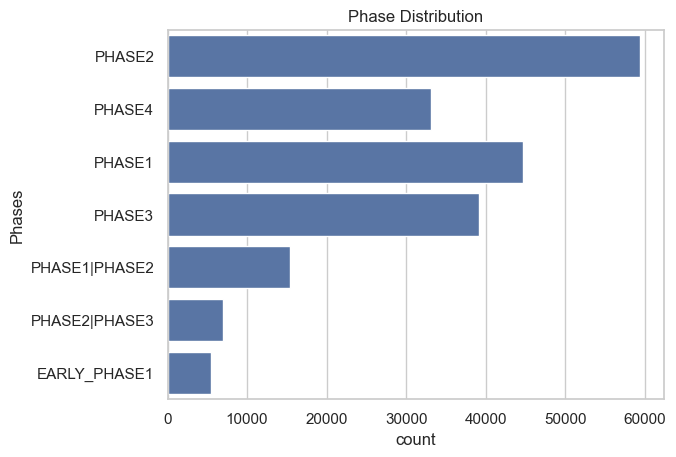

In [24]:
# Visualize how commonplace the different values are in the Phase field
sns.countplot(y=df['Phases'])
plt.title('Phase Distribution')

There are some trials that show multiple phases such as Phase 1|Phase 2. These are scenarios where the phases are running concurrently. For the sake of this analysis, trials containing multiple phases will be converted to the higher of the two phases in the 03_cleaning notebook.

## 8. Interventions Exploration

In [25]:
# Show a sample of Intervention values
df['Interventions'].sample(7)

230761    BEHAVIORAL: Mindfulness-Based Stress Reduction...
249919    OTHER: Pecan-containing diet|OTHER: Nut-free diet
321824    DRUG: NPH/Regular 70/30 mix|DRUG: insulin aspa...
255642    OTHER: Conditioned Stimulus + (CS+): Flavored ...
501673      OTHER: At home removal|OTHER: In office removal
400347                                       DRUG: Oxytocin
251673    DEVICE: High-end hearing aid|DEVICE: Basic hea...
Name: Interventions, dtype: object

In [26]:
# Explore the frequency of different Intervention types using regex
df['Interventions'].str.extract(r'^([A-Z]+):', expand=False).value_counts()

Interventions
DRUG          177688
OTHER          81346
DEVICE         61076
BEHAVIORAL     50922
PROCEDURE      43007
BIOLOGICAL     24049
RADIATION       5053
GENETIC         2096
Name: count, dtype: int64

The `Interventions` field contains a range of intervention types, but for the purpose of focusing on global drug development, I will restrict the analysis in the 03_cleaning notebook to trials involving `Drug` and `Biological` interventions. Other intervention types are excluded as they do not directly reflect pharmaceutical or biologic drug development pipelines.

In [ ]:
# Determine the percentage of trials that have multiple interventions
df['Interventions'].str.contains(r'\|', na=False).mean()

np.float64(0.4741994762540847)

Interventions often contain multiple components (for example, a drug and a device) that will need to be parsed in the cleaning notebook for proper analysis. The above output shows approximately 47% of all clinical trials contain multiple interventions, so there is significant parsing and cleaning required before a proper analysis can take place.

## 9. Conditions Exploration

In [ ]:
# Show the most common Conditions
df['Conditions'].value_counts().head(20)

Conditions
Healthy                      8497
Breast Cancer                4763
Prostate Cancer              2790
Obesity                      2415
Asthma                       2379
Stroke                       2160
Healthy Volunteers           2021
Hypertension                 1846
Coronary Artery Disease      1681
Rheumatoid Arthritis         1635
Heart Failure                1627
Diabetes Mellitus, Type 2    1570
Cancer                       1568
COVID-19                     1552
Multiple Sclerosis           1544
Colorectal Cancer            1506
HIV Infections               1483
Lung Cancer                  1468
Pain                         1451
Schizophrenia                1449
Name: count, dtype: int64

Text(0.5, 0, 'Number of Trials')

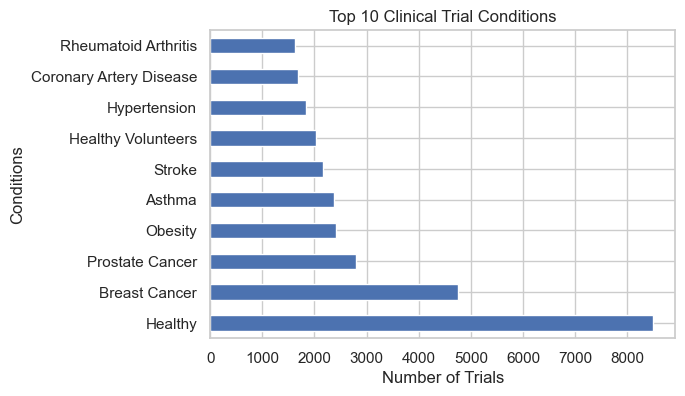

In [ ]:
# Visualize the most common Conditions
df['Conditions'].value_counts().head(10).plot(kind='barh', figsize=(6,4))
plt.title("Top 10 Clinical Trial Conditions")
plt.xlabel("Number of Trials")

In [ ]:
# Show random sample of trial Conditions to understand value formats
df['Conditions'].sample(10).tolist()

['Osteoarthritis of the Knee',
 'Fatty Liver',
 'Transitional Cell Carcinoma|Bladder Cancer|Carcinoma in Situ|Carcinoma in Situ Concurrent With Papillary Tumors',
 'Prostatic Neoplasms',
 'Intestinal Gas',
 'Sexual Harassment|Sexual Abuse|Psychological Distress|Prevention',
 'Irritable Bowel Syndrome With Diarrhea',
 'Primary Ciliary Dyskinesia|Cystic Fibrosis',
 'Healthy Volunteers',
 'Healthy Volunteers|Normocholesterolaemic Men|Normozoospermic Men']

Like the `Interventions` series, the `Conditions` series has instances of multiple values for one trial.

In [32]:
# Determine how many trials have multiple Conditions
multiple = df['Conditions'].str.contains(r"\|", na=False)
multiple.sum(), len(df), multiple.mean()

(np.int64(187283), 530028, np.float64(0.3533454836348268))

About 35% (187,283 trials) of all trials contain multiple Conditions. These multiple Condition trials will be split out into a long format dataframe in the 03_cleaning notebook.

## 10. Locations Exploration

In [33]:
# Show a sample of the Locations series
df['Locations'].sample(10)

354589                                                  NaN
172444    Ghent University, Ghent, Oost-Vlaanderen, 9000...
507235              Sohag University Hospital, Sohag, Egypt
271214                                                  NaN
250932    Faculty of Dentistry, The University of Hong K...
376970    Novartis Investigative Site, Fortaleza, Ceará,...
332353    An Lao District Health Center - Bat Trang, Hai...
76616     GSK Investigational Site, Savannah, Georgia, 3...
473759    Alaska Urological, Anchorage, Alaska, 99503, U...
276701    Beijing Cancer Hospital, Beijing, Beijing Muni...
Name: Locations, dtype: object

The `Locations` column contains non-standardized site descriptions, including combinations of site names, cities, states, and countries. The primary focus on Locations in this analysis will be on the countries that are used for clinical trial sites, so this data will require extraction of the country name in the 03_cleaning notebook.

## 11. Sponsors Exploration

In [34]:
# Show the most common Sponsors
df['Sponsor'].value_counts()

Sponsor
Cairo University                                         3599
GlaxoSmithKline                                          3551
National Cancer Institute (NCI)                          3476
AstraZeneca                                              3295
Assiut University                                        3237
                                                         ... 
Morehead State University                                   1
Michael A. McCaskey                                         1
Mahmoud Massoud                                             1
Asociación de Oncología Médica del Hospital de Cruces       1
National Food Technology Research Centre, Botswana          1
Name: count, Length: 46212, dtype: int64

In [35]:
# Show the most common Funder Types
df['Funder Type'].value_counts()

Funder Type
OTHER        375118
INDUSTRY     120900
OTHER_GOV     13654
NIH           10523
NETWORK        4638
FED            4572
INDIV           550
UNKNOWN          70
AMBIG             3
Name: count, dtype: int64

Funnder Type and Sponsor will offer useful correlations with other key datapoints in this dataset. The Sponsor distribution is very long-tailed, meaning there is a extremely high number of sponsors that only appear once. As a result, the more general Funder Type data may provide more useful correlations, once cleaned and standardized.

Further work on this project will take place in notebook 03_cleaning.